In [2]:
import pandas as pd
import numpy as np

In [3]:
cols = [
    'symboling', 
    'normalized-losses', 
    'make', 
    'fuel-type', 
    'aspiration', 
    'num-of-doors', 
    'body-style', 
    'drive-wheels', 
    'engine-location', 
    'wheel-base', 
    'length', 
    'width', 
    'height', 
    'curb-weight', 
    'engine-type', 
    'num-of-cylinders', 
    'engine-size', 
    'fuel-system', 
    'bore', 
    'stroke', 
    'compression', 
    'horsepower', 
    'peak-rpm', 
    'city-mpg', 
    'highway-mpg', 
    'price'
]

cars = pd.read_csv("imports-85.data", header=None, names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.replace('?', np.nan, inplace=True)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
types = {
    'normalized-losses':'float', 
    'bore':'float', 
    'stroke':'float', 
    'horsepower':'float',
    'peak-rpm':'float',
    'price':'float'
}

cars = cars.astype(dtype=types)
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression          float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [6]:
cars.head()
losses_nulls = cars['normalized-losses'][cars['normalized-losses'].isnull()]

print(cars.shape, losses_nulls.shape)

(205, 26) (41,)


In [7]:
numerics = cars.select_dtypes(include=['int64', 'float64'])
print("column: nulls out of "+str(numerics.shape[0]))

for c in numerics.columns:
        nulls = numerics[c][numerics[c].isnull()]
        print(c+': '+str(nulls.shape[0]))        

column: nulls out of 205
symboling: 0
normalized-losses: 41
wheel-base: 0
length: 0
width: 0
height: 0
curb-weight: 0
engine-size: 0
bore: 4
stroke: 4
compression: 0
horsepower: 2
peak-rpm: 2
city-mpg: 0
highway-mpg: 0
price: 4


In [8]:
cars.dropna(inplace=True, subset=['bore', 'stroke', 'horsepower', 'price'])

In [9]:
cars['normalized-losses'].fillna(value=np.mean(cars['normalized-losses']), inplace=True)

In [10]:
cars_norm = cars.copy()

for c in numerics.columns:
    xmin = cars_norm[c].min()
    xdenom = cars_norm[c].max() - xmin 
    
    cars_norm[c] = cars_norm[c].apply(lambda x: (x-xmin)/xdenom)
    
cars_norm.head()    

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.294764,alfa-romero,gas,std,two,convertible,rwd,front,0.058309,...,0.260377,mpfi,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,1.0,0.294764,alfa-romero,gas,std,two,convertible,rwd,front,0.058309,...,0.260377,mpfi,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.6,0.294764,alfa-romero,gas,std,two,hatchback,rwd,front,0.230321,...,0.343396,mpfi,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.8,0.518325,audi,gas,std,four,sedan,fwd,front,0.384840,...,0.181132,mpfi,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.8,0.518325,audi,gas,std,four,sedan,4wd,front,0.373178,...,0.283019,mpfi,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


symboling: [0.26665839389521545, 0.23151453967335528, 0.25418643708347483, 0.25655103616677227, 0.27989399806155685]
normalized-losses: [0.17785556377935458, 0.16029502650443844, 0.17282011616888274, 0.17951677950846798, 0.17731705280372442]
wheel-base: [0.10434593881625645, 0.15089823470931354, 0.15550702266469163, 0.17419838266195739, 0.18074958421950227]
length: [0.14236991994578516, 0.17421214512397531, 0.18282295211914423, 0.18373855941082523, 0.18272999978820026]
width: [0.096855000803311664, 0.1271891596281802, 0.15345820078802092, 0.16130166797436071, 0.16666424746948025]
height: [0.24272955094179541, 0.2360256996587754, 0.20888647997454488, 0.21096062365613569, 0.2140585720484954]
curb-weight: [0.12738311321139248, 0.13853200290319781, 0.13899143356573498, 0.12999136934829764, 0.13413081858816803]
engine-size: [0.074871284387954665, 0.077757246107754321, 0.08690214571293578, 0.10522866322326119, 0.11401934333633865]
bore: [0.16751428941068081, 0.15011319018911967, 0.1543464504

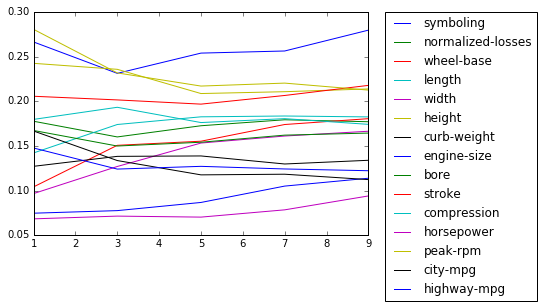

In [33]:
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

kk = list(range(1, 10, 2))

def knn_train_test(x, y, df, k):
    np.random.seed(42)
    mask = np.random.rand(df.shape[0]) < 0.8
    
    df_train = df.loc[mask]
    df_test = df.loc[~mask]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(df_train[x], df_train[y])
    
    labels = knn.predict(df_test[x])
    mse = mean_squared_error(df_test[y], labels)
    
    return mse**.5

for c in numerics.columns:
    if c=='price':
        continue
    
    rmses = []
    
    for k in kk:
        rmse = knn_train_test([c], ['price'], cars_norm, k)
        rmses.append(rmse)
        
    print(c + ": " + str(rmses))
    plt.plot(kk, rmses, label=c)
  
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [36]:
cols = [c for c in numerics.columns if c!='price']
rmses = []
    
rmse = knn_train_test(['horsepower', 'engine-size'], ['price'], cars_norm, 5)
rmses.append(rmse)

rmse = knn_train_test(['horsepower', 'engine-size', 'curb-weight'], ['price'], cars_norm, 5)
rmses.append(rmse) 

rmse = knn_train_test(['horsepower', 'engine-size', 'curb-weight', 'highway-mpg'], ['price'], cars_norm, 5)
rmses.append(rmse) 

rmse = knn_train_test(['horsepower', 'engine-size', 'curb-weight', 'highway-mpg', 'city-mpg'], ['price'], cars_norm, 5)
rmses.append(rmse) 

rmse = knn_train_test(cols, ['price'], cars_norm, 5)
rmses.append(rmse)

rmses

[0.081544820602470661,
 0.10686563060284909,
 0.10603163267731056,
 0.10464200837280664,
 0.11411494171051773]

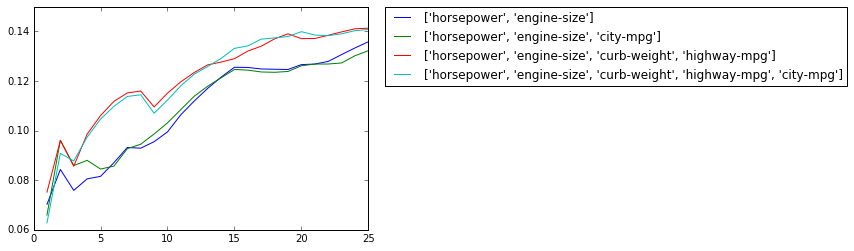

In [44]:
features2 = ['horsepower', 'engine-size']
features3 = ['horsepower', 'engine-size', 'city-mpg']
features5 = ['horsepower', 'engine-size', 'curb-weight', 'highway-mpg', 'city-mpg']
features4 = ['horsepower', 'engine-size', 'curb-weight', 'highway-mpg']

kk = list(range(1, 26))

for c in [features2, features3, features4, features5]:
    rmses = []
    
    for k in kk:
        rmse = knn_train_test(c, ['price'], cars_norm, k)
        rmses.append(rmse)
        
#     print(str(c) + ": " + str(rmses))
    plt.plot(kk, rmses, label=c)
  
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


next steps:
-Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
-Modify the knn_train_test() function to perform the data cleaning as well.